# 🧠 Neural Network Architectures: From Basic to Advanced

This section demonstrates various implementations of a neural network, progressively advancing from a manual NumPy version to PyTorch and TensorFlow with deeper layers and different activation functions. These examples will help you understand how architectural choices impact training and performance.

---



# 🧠 Neural Network with One Hidden Layer (from scratch using NumPy)

In [7]:
import numpy as np

# Sigmoid Activation Function and Derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error Loss Function
def mse_loss(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

# Input Dataset (4 samples, 2 features)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Output Dataset (XOR Problem)
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

# Seed for reproducibility
np.random.seed(42)

# Architecture Parameters
input_layer_neurons = X.shape[1]   # 2 features
hidden_layer_neurons = 4           # try increasing this
output_neurons = 1                 # binary output

# Weight and Bias Initialization
wh = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))  # weights for hidden layer
bh = np.random.uniform(size=(1, hidden_layer_neurons))                    # bias for hidden layer
wo = np.random.uniform(size=(hidden_layer_neurons, output_neurons))       # weights for output layer
bo = np.random.uniform(size=(1, output_neurons))                          # bias for output layer

# Training Parameters
epochs = 10000
learning_rate = 0.1

# Training Loop
for epoch in range(epochs):
    # Forward Propagation
    hidden_input = np.dot(X, wh) + bh
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, wo) + bo
    predicted_output = sigmoid(final_input)

    # Loss Calculation
    loss = mse_loss(y, predicted_output)

    # Backpropagation
    error = y - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(wo.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_output)

    # Update Weights and Biases
    wo += hidden_output.T.dot(d_predicted_output) * learning_rate
    bo += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    wh += X.T.dot(d_hidden_layer) * learning_rate
    bh += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch} - Loss: {loss:.6f}")

# Final Output
print("\nFinal Output after Training:")
print(predicted_output.round(3))

Epoch 0 - Loss: 0.332183
Epoch 1000 - Loss: 0.249044
Epoch 2000 - Loss: 0.244445
Epoch 3000 - Loss: 0.218039
Epoch 4000 - Loss: 0.156119
Epoch 5000 - Loss: 0.055950
Epoch 6000 - Loss: 0.020902
Epoch 7000 - Loss: 0.010895
Epoch 8000 - Loss: 0.006879
Epoch 9000 - Loss: 0.004864

Final Output after Training:
[[0.047]
 [0.957]
 [0.925]
 [0.072]]


## ✅ 1. Neural Network with One Hidden Layer (Manual with NumPy)

A simple neural network built from scratch with:
- 1 input layer
- 1 hidden layer (4 neurons, Sigmoid activation)
- 1 output layer (Sigmoid)

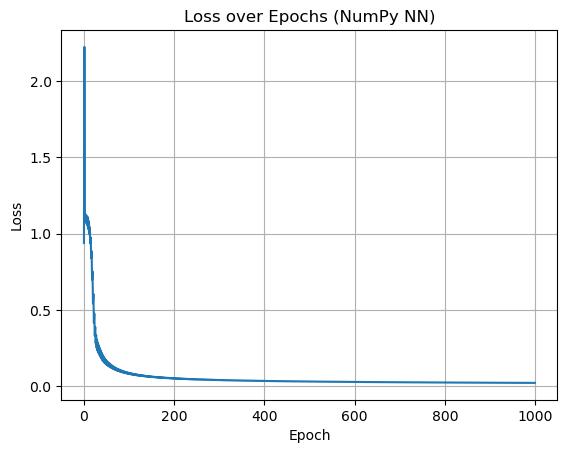

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset: binary classification
X = np.linspace(0, 1, 100).reshape(-1, 1)
y = (X > 0.5).astype(float)

# Initialize weights
input_dim = 1
hidden_dim = 4
output_dim = 1

W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))

def sigmoid(z): return 1 / (1 + np.exp(-z))
def sigmoid_deriv(z): return sigmoid(z) * (1 - sigmoid(z))

# Training
lr = 0.1
epochs = 1000
losses = []

for epoch in range(epochs):
    # Forward pass
    Z1 = X @ W1 + b1
    A1 = sigmoid(Z1)
    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)

    # Binary cross entropy loss
    loss = -np.mean(y * np.log(A2 + 1e-8) + (1 - y) * np.log(1 - A2 + 1e-8))
    losses.append(loss)

    # Backward pass
    dZ2 = A2 - y
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * sigmoid_deriv(Z1)
    dW1 = X.T @ dZ1
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

# Loss curve
plt.plot(losses)
plt.title("Loss over Epochs (NumPy NN)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

# 🔹 PyTorch Version


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

# Data
x = torch.tensor([[0.1], [0.2]], dtype=torch.float32)
y = torch.tensor([[1.0]], dtype=torch.float32)

# Define simple model
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        z1 = self.fc1(x)
        a1 = self.sigmoid(z1)
        z2 = self.fc2(a1)
        a2 = self.sigmoid(z2)
        return a2

model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Forward
output = model(x.T)  # Note: input shape [batch_size, features]
loss = criterion(output, y)
print(f"Initial Loss: {loss.item():.4f}")

# Backward + Update
loss.backward()
optimizer.step()


Initial Loss: 0.1257


# ⚡ 2. Neural Network using PyTorch
#### Simplified with PyTorch's high-level API.

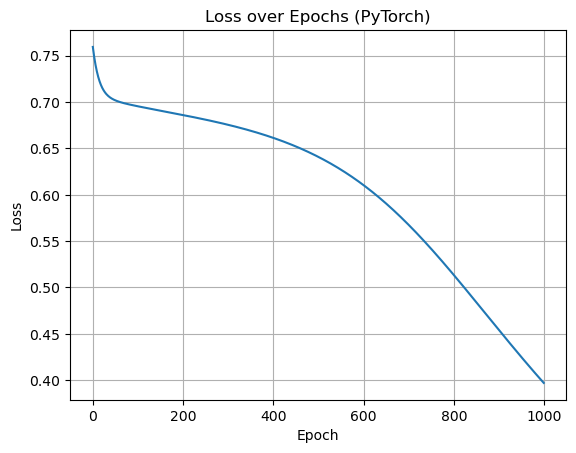

In [8]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Dataset
X = torch.linspace(0, 1, 100).unsqueeze(1)
y = (X > 0.5).float()

# Model with 1 hidden layer (4 neurons)
model = nn.Sequential(
    nn.Linear(1, 4),
    nn.Sigmoid(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

losses = []
for epoch in range(1000):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(losses)
plt.title("Loss over Epochs (PyTorch)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()


# 🔹 TensorFlow + Keras Version

In [4]:
import tensorflow as tf
from tensorflow.keras import Model, layers, optimizers, losses

# Data
x = tf.constant([[0.1], [0.2]], dtype=tf.float32)  # shape (2, 1)
y = tf.constant([[1.0]], dtype=tf.float32)

# Model Definition
class SimpleModel(Model):
    def __init__(self):
        super().__init__()
        self.fc1 = layers.Dense(2, activation='sigmoid', use_bias=True)
        self.fc2 = layers.Dense(1, activation='sigmoid', use_bias=True)

    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model = SimpleModel()
optimizer = optimizers.SGD(learning_rate=0.1)
mse_loss = losses.MeanSquaredError()

# Forward + Backward + Update using GradientTape
with tf.GradientTape() as tape:
    output = model(tf.transpose(x))  # shape [1, 2]
    loss = mse_loss(y, output)
    print(f"Initial Loss: {loss.numpy():.4f}")

gradients = tape.gradient(loss, model.trainable_variables)
optimizer.apply_gradients(zip(gradients, model.trainable_variables))


Initial Loss: 0.5563


<KerasVariable shape=(), dtype=int64, path=SGD/iteration>

# ⚙️ 3. Neural Network using TensorFlow/Keras
#### Straightforward implementation using TensorFlow.

C:\Users\goura\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


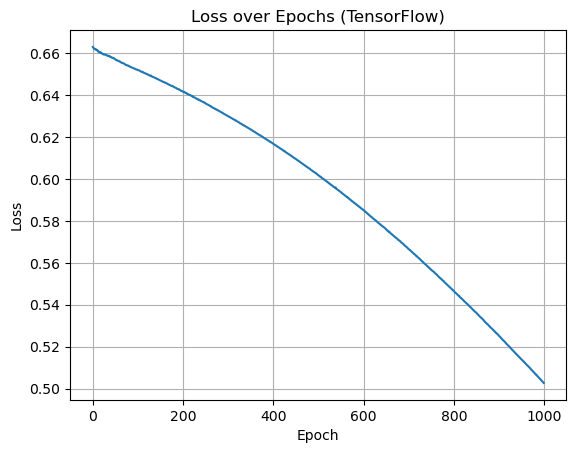

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 1, 100).reshape(-1, 1)
y = (X > 0.5).astype(float)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy')
history = model.fit(X, y, epochs=1000, verbose=0)

plt.plot(history.history['loss'])
plt.title("Loss over Epochs (TensorFlow)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()


# 🔁 4. Deep Neural Network with ReLU Activation (PyTorch)

- This version adds:

- Multiple hidden layers

- ReLU activation

- Still binary classification

In [10]:
model = nn.Sequential(
    nn.Linear(1, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

### 🔍 Summary

| Version      | Framework   | Highlights                                           |
|--------------|-------------|------------------------------------------------------|
| Manual       | NumPy       | Understand internal mechanics (forward + backprop)  |
| Basic Model  | PyTorch     | Easier implementation using high-level API          |
| Basic Model  | TensorFlow  | Concise and production-friendly                     |
| Deep Model   | PyTorch     | Showcases deeper architecture with ReLU             |
